In [93]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [94]:
!pip install matplotlib seaborn

In [95]:
import warnings
warnings.simplefilter("ignore")

In [96]:
df = pd.read_csv("train.csv")
df.head()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN25630,2,1,2,1,Meal Plan 1,0,Room_Type 1,26,2017,10,17,Online,0,0,0,161.00,0,Not_Canceled
1,INN14474,2,1,1,1,Meal Plan 1,0,Room_Type 1,98,2018,7,16,Online,0,0,0,121.50,2,Not_Canceled
2,INN23721,2,0,0,3,Meal Plan 1,0,Room_Type 1,433,2018,9,8,Offline,0,0,0,70.00,0,Canceled
3,INN05844,2,0,2,5,Meal Plan 1,0,Room_Type 1,195,2018,8,8,Offline,0,0,0,72.25,0,Not_Canceled
4,INN18710,1,0,0,2,Meal Plan 1,0,Room_Type 1,188,2018,6,15,Offline,0,0,0,130.00,0,Canceled


In [97]:
df.columns

Index(['Booking_ID', 'no_of_adults', 'no_of_children', 'no_of_weekend_nights',
       'no_of_week_nights', 'type_of_meal_plan', 'required_car_parking_space',
       'room_type_reserved', 'lead_time', 'arrival_year', 'arrival_month',
       'arrival_date', 'market_segment_type', 'repeated_guest',
       'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled',
       'avg_price_per_room', 'no_of_special_requests', 'booking_status'],
      dtype='object')

In [98]:
df.drop(columns=['Booking_ID'], inplace=True)

In [99]:
df.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,2,1,2,1,Meal Plan 1,0,Room_Type 1,26,2017,10,17,Online,0,0,0,161.00,0,Not_Canceled
1,2,1,1,1,Meal Plan 1,0,Room_Type 1,98,2018,7,16,Online,0,0,0,121.50,2,Not_Canceled
2,2,0,0,3,Meal Plan 1,0,Room_Type 1,433,2018,9,8,Offline,0,0,0,70.00,0,Canceled
3,2,0,2,5,Meal Plan 1,0,Room_Type 1,195,2018,8,8,Offline,0,0,0,72.25,0,Not_Canceled
4,1,0,0,2,Meal Plan 1,0,Room_Type 1,188,2018,6,15,Offline,0,0,0,130.00,0,Canceled


In [100]:
df.shape

(29020, 18)

In [101]:
#check for null values
df.isnull().sum()

no_of_adults                            0
no_of_children                          0
no_of_weekend_nights                    0
no_of_week_nights                       0
type_of_meal_plan                       0
required_car_parking_space              0
room_type_reserved                      0
lead_time                               0
arrival_year                            0
arrival_month                           0
arrival_date                            0
market_segment_type                     0
repeated_guest                          0
no_of_previous_cancellations            0
no_of_previous_bookings_not_canceled    0
avg_price_per_room                      0
no_of_special_requests                  0
booking_status                          0
dtype: int64

In [102]:
#check for duplicate values
df.duplicated().sum()

np.int64(7661)

In [103]:
#drop duplicate values
df.drop_duplicates(inplace=True)

In [104]:
df.shape

(21359, 18)

In [105]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21359 entries, 0 to 29019
Data columns (total 18 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   no_of_adults                          21359 non-null  int64  
 1   no_of_children                        21359 non-null  int64  
 2   no_of_weekend_nights                  21359 non-null  int64  
 3   no_of_week_nights                     21359 non-null  int64  
 4   type_of_meal_plan                     21359 non-null  object 
 5   required_car_parking_space            21359 non-null  int64  
 6   room_type_reserved                    21359 non-null  object 
 7   lead_time                             21359 non-null  int64  
 8   arrival_year                          21359 non-null  int64  
 9   arrival_month                         21359 non-null  int64  
 10  arrival_date                          21359 non-null  int64  
 11  market_segment_type 

In [106]:
df.columns

Index(['no_of_adults', 'no_of_children', 'no_of_weekend_nights',
       'no_of_week_nights', 'type_of_meal_plan', 'required_car_parking_space',
       'room_type_reserved', 'lead_time', 'arrival_year', 'arrival_month',
       'arrival_date', 'market_segment_type', 'repeated_guest',
       'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled',
       'avg_price_per_room', 'no_of_special_requests', 'booking_status'],
      dtype='object')

In [107]:
df['no_of_adults'].value_counts()

no_of_adults
2    15489
1     3996
3     1748
0      113
4       13
Name: count, dtype: int64

In [108]:
df['no_of_children'].value_counts()

no_of_children
0     19251
1      1257
2       837
3        11
9         2
10        1
Name: count, dtype: int64

In [109]:
df['room_type_reserved'].value_counts()

room_type_reserved
Room_Type 1    15375
Room_Type 4     4403
Room_Type 6      758
Room_Type 2      500
Room_Type 5      190
Room_Type 7      129
Room_Type 3        4
Name: count, dtype: int64

In [110]:
df['booking_status'].value_counts()

booking_status
Not_Canceled    15231
Canceled         6128
Name: count, dtype: int64

In [111]:
df.columns

Index(['no_of_adults', 'no_of_children', 'no_of_weekend_nights',
       'no_of_week_nights', 'type_of_meal_plan', 'required_car_parking_space',
       'room_type_reserved', 'lead_time', 'arrival_year', 'arrival_month',
       'arrival_date', 'market_segment_type', 'repeated_guest',
       'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled',
       'avg_price_per_room', 'no_of_special_requests', 'booking_status'],
      dtype='object')

In [112]:
#categorical columns
cat_cols = ['room_type_reserved','booking_status', 'type_of_meal_plan',
            'market_segment_type','repeated_guest', 'required_car_parking_space']

num_cols =['no_of_adults', 'no_of_children', 'no_of_weekend_nights',
       'no_of_week_nights','lead_time', 'arrival_year', 'arrival_month',
       'arrival_date', 'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled',
       'avg_price_per_room', 'no_of_special_requests']

In [113]:
len(cat_cols), len(num_cols)

(6, 12)

### DATA ANALYSIS

In [114]:
data = df.copy()

In [115]:
data.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,2,1,2,1,Meal Plan 1,0,Room_Type 1,26,2017,10,17,Online,0,0,0,161.00,0,Not_Canceled
1,2,1,1,1,Meal Plan 1,0,Room_Type 1,98,2018,7,16,Online,0,0,0,121.50,2,Not_Canceled
2,2,0,0,3,Meal Plan 1,0,Room_Type 1,433,2018,9,8,Offline,0,0,0,70.00,0,Canceled
3,2,0,2,5,Meal Plan 1,0,Room_Type 1,195,2018,8,8,Offline,0,0,0,72.25,0,Not_Canceled
4,1,0,0,2,Meal Plan 1,0,Room_Type 1,188,2018,6,15,Offline,0,0,0,130.00,0,Canceled


In [116]:
def num_plot_dist(df, num_features):
    fig, axes = plt.subplots(len(num_features), 2, figsize=(15, 5 * len(num_features)))
    if len(num_features) == 1:
        axes = [axes]

    for i, column in enumerate(num_features):
        sns.histplot(data=df, x=column, kde=True, ax=axes[i][0], palette="Blues")
        axes[i][0].set_title(f'Histogram for {column}')

        sns.boxplot(data=df, x=column,  ax=axes[i][1], palette='Blues')
        axes[i][1].set_title(f'Boxplot of {column}')

    plt.tight_layout()
    plt.show()

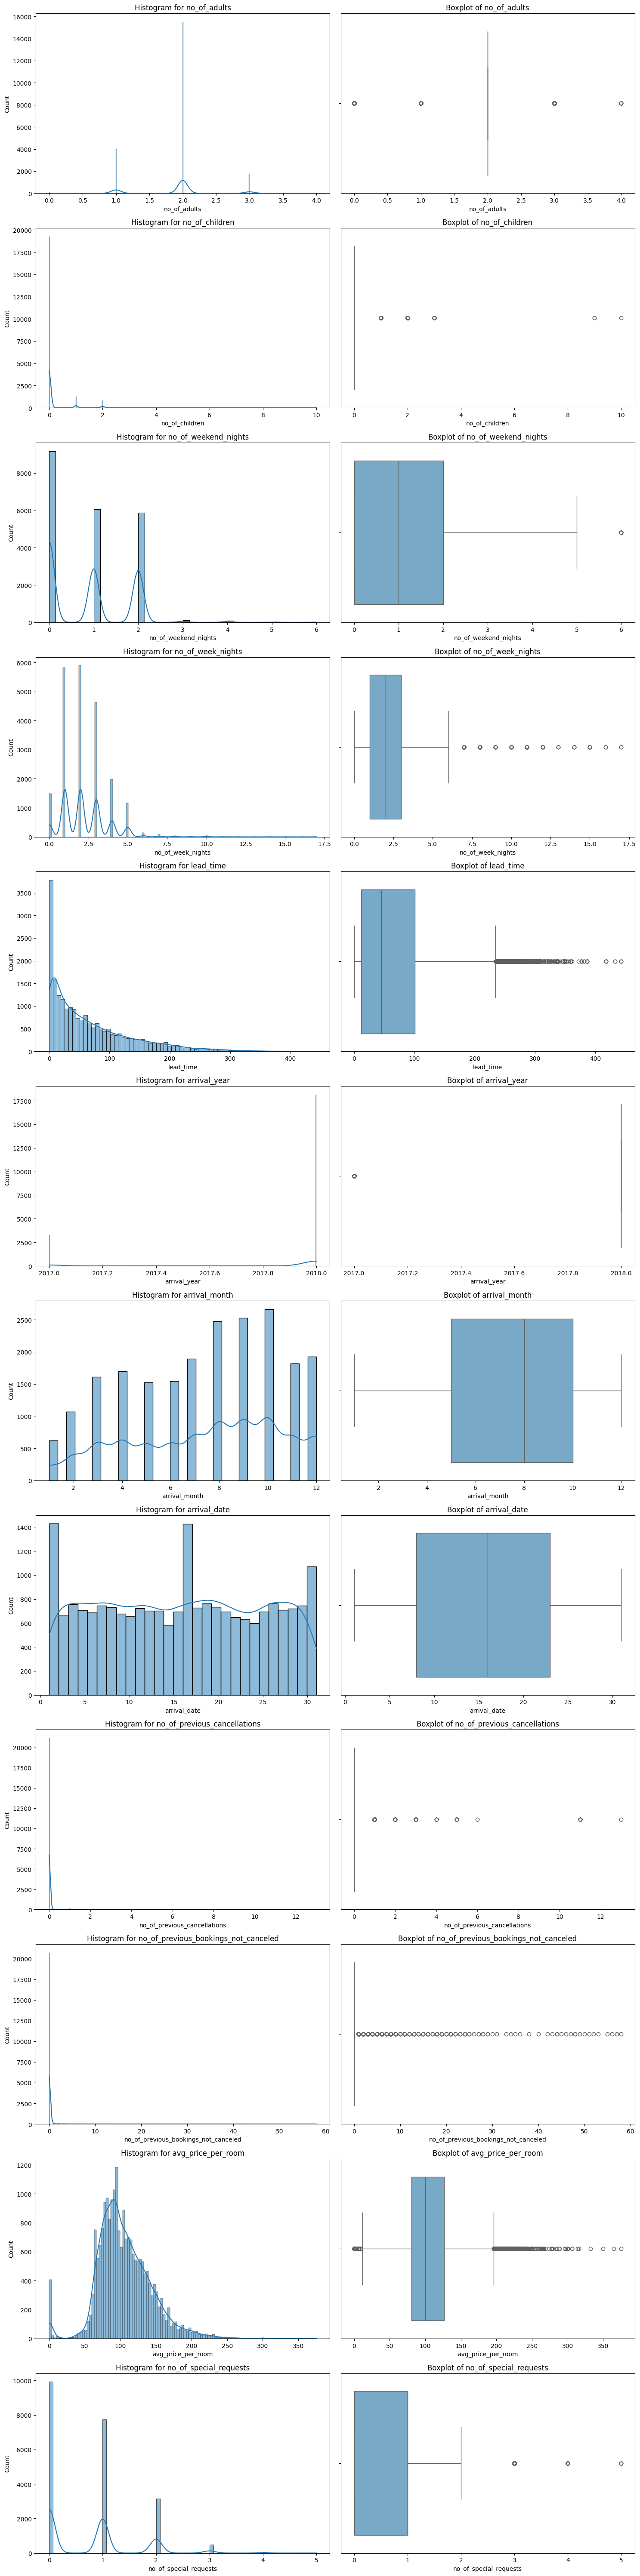

In [117]:
num_plot_dist(data, num_cols)

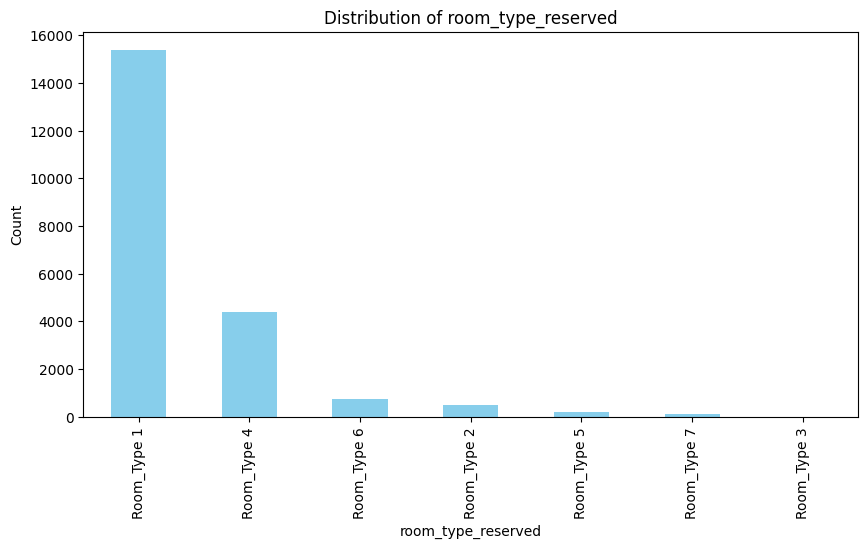

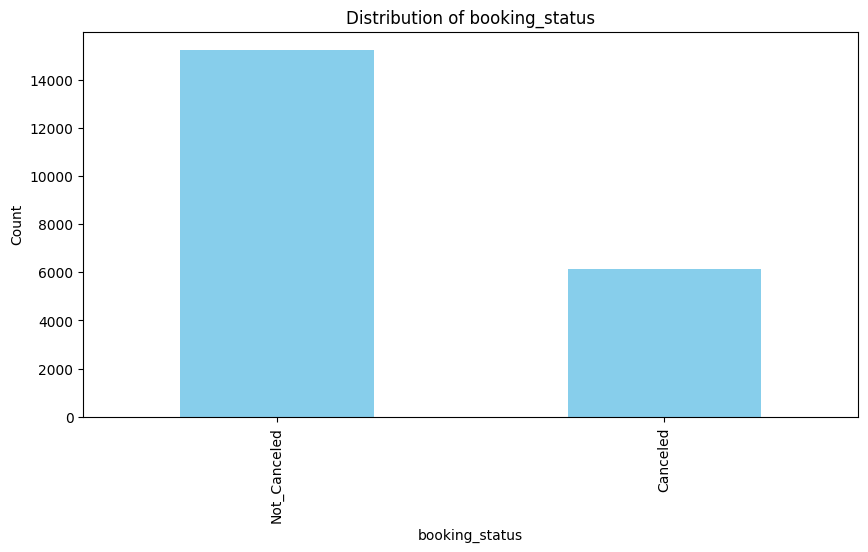

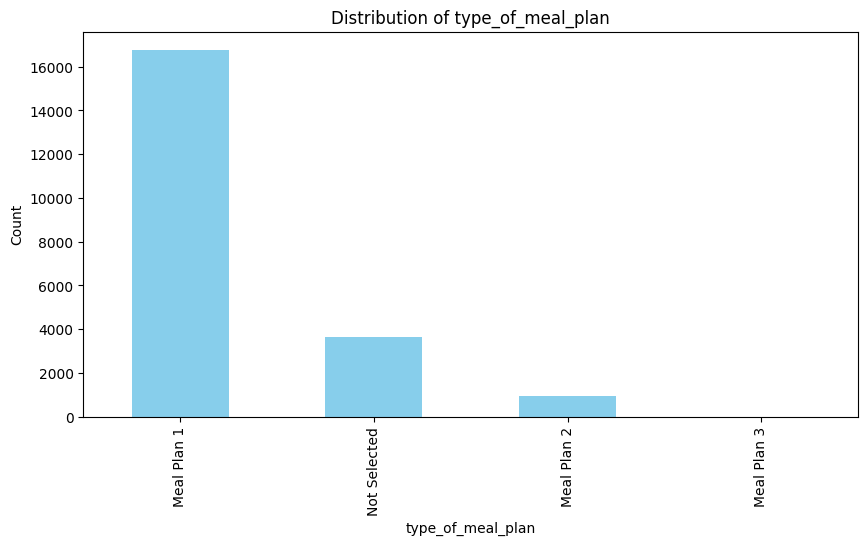

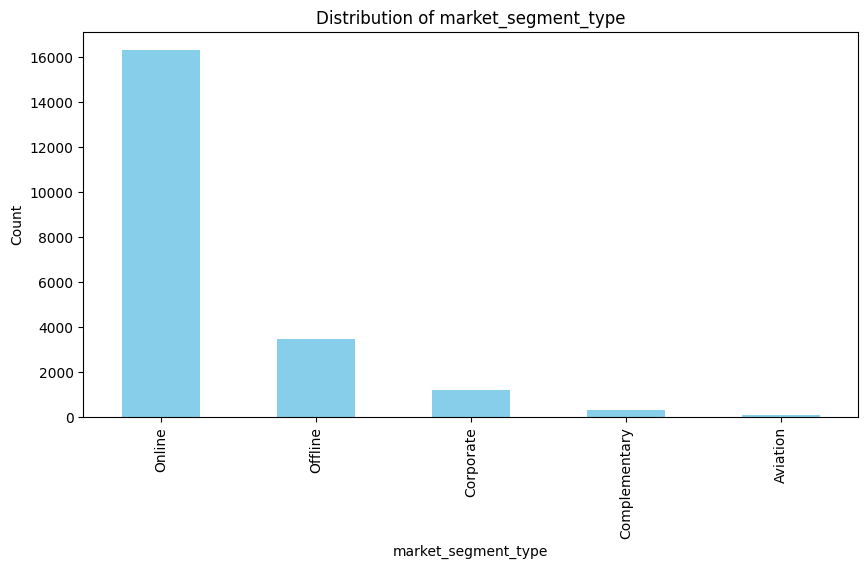

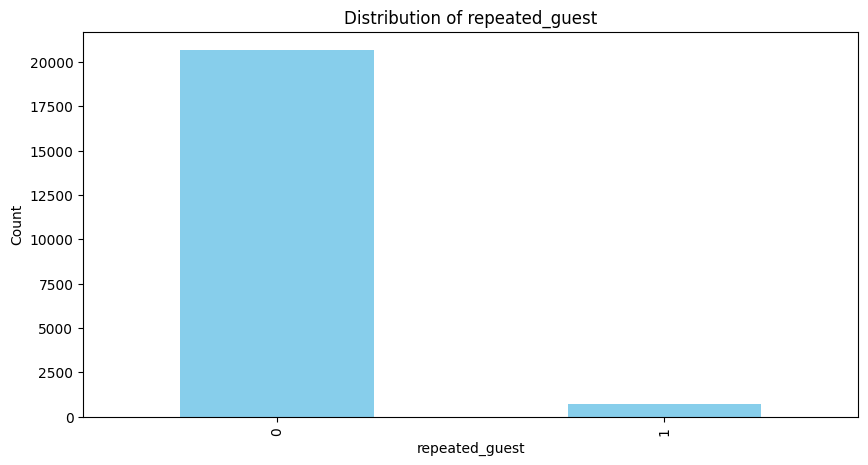

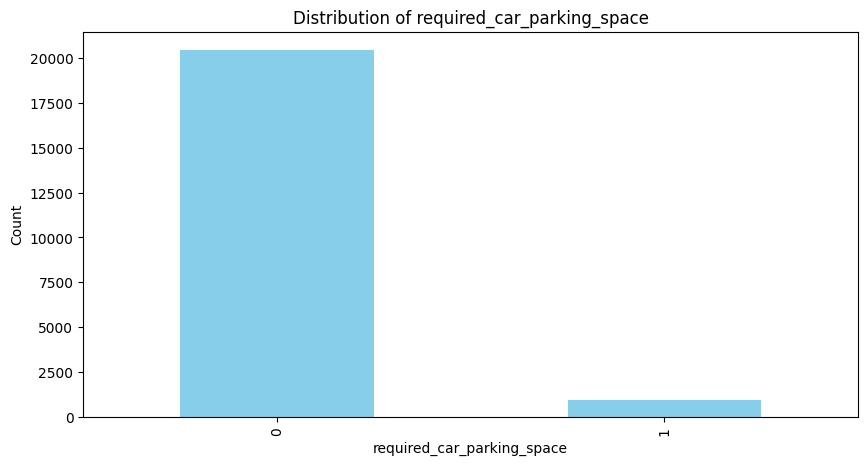

In [118]:
#Univariate analysis of categorical features
for cat_features in cat_cols:
    plt.figure(figsize=(10, 5))
    data[cat_features].value_counts().plot(kind='bar', color='skyblue')
    plt.title(f'Distribution of {cat_features}')
    plt.xlabel(cat_features)
    plt.ylabel('Count')
    plt.show()

## Bivariate Analysis

In [119]:
def plot_bivariate_num(df, target, num_features):
    """Plot boxplots for numerical features against a target variable."""
    num_plots = len(num_features)
    num_rows = (num_plots + 1) // 2  # Two plots per row
    fig, axes = plt.subplots(num_rows, 2, figsize=(15, 5 * num_rows))
    axes = axes.flatten() if num_rows > 1 else [axes]  # Flatten axes if multiple rows

    for i, column in enumerate(num_features):
        sns.boxplot(data=df, x=target, y=column, ax=axes[i], palette='Blues')
        axes[i].set_title(f'Boxplot of {column} VS {target}')
        
    plt.tight_layout()
    plt.show()

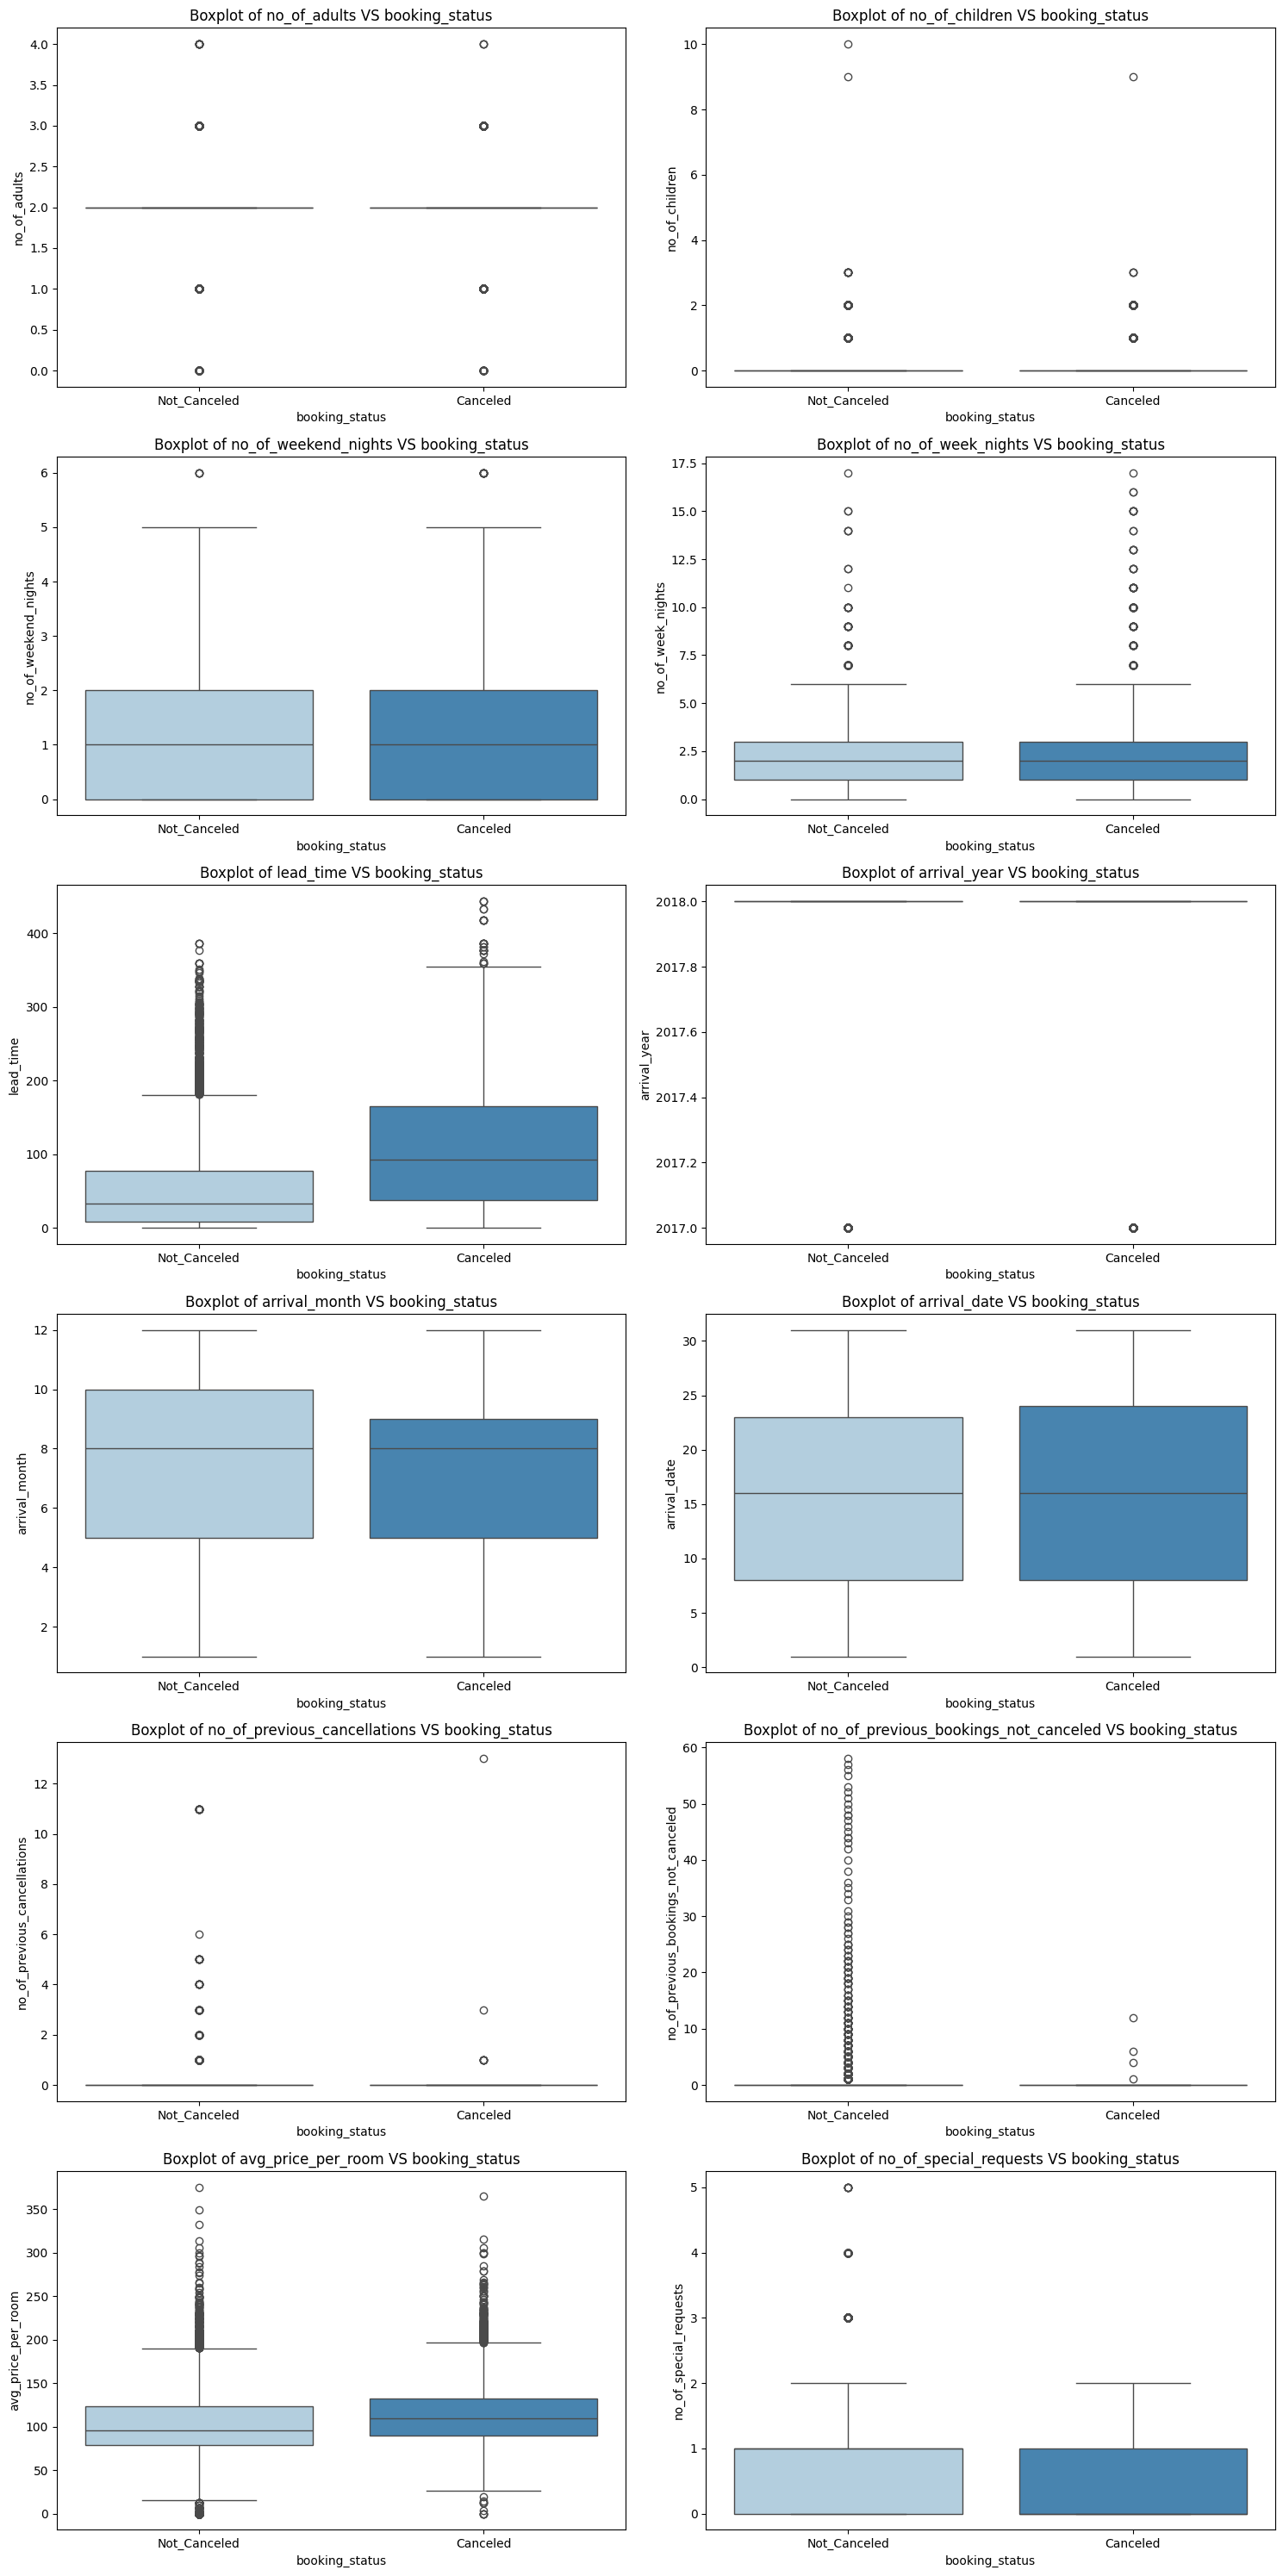

In [120]:
plot_bivariate_num(data, 'booking_status', num_cols)

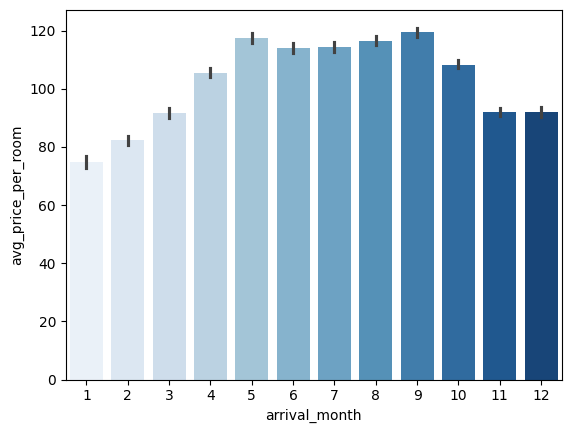

In [121]:
sns.barplot(x='arrival_month', y='avg_price_per_room', data=data, palette='Blues')
plt.show()

### Bivariate Analysis of Categorical Feature

In [122]:
%matplotlib inline

def plot_bivariate_cat(df, target, cat_features):
    """Plot count plots for categorical features against a target variable."""
    num_features = len(cat_features)
    num_rows = (num_features + 1) // 2  # Two plots per row
    
    fig, axes = plt.subplots(num_rows, 2, figsize=(15, 5 * num_rows))
    axes = axes.flatten() if num_rows > 1 else [axes]  # Flatten axes if multiple rows

    for i, feature in enumerate(cat_features):
        sns.countplot(data=df, x=feature, hue=target, ax=axes[i], palette=['red', 'blue'])
        axes[i].set_title(f'Count plot of {feature} VS {target}')
        axes[i].tick_params(axis='x', rotation=90)  # Rotate x-axis labels for better readability
        
    plt.tight_layout()
    plt.show()

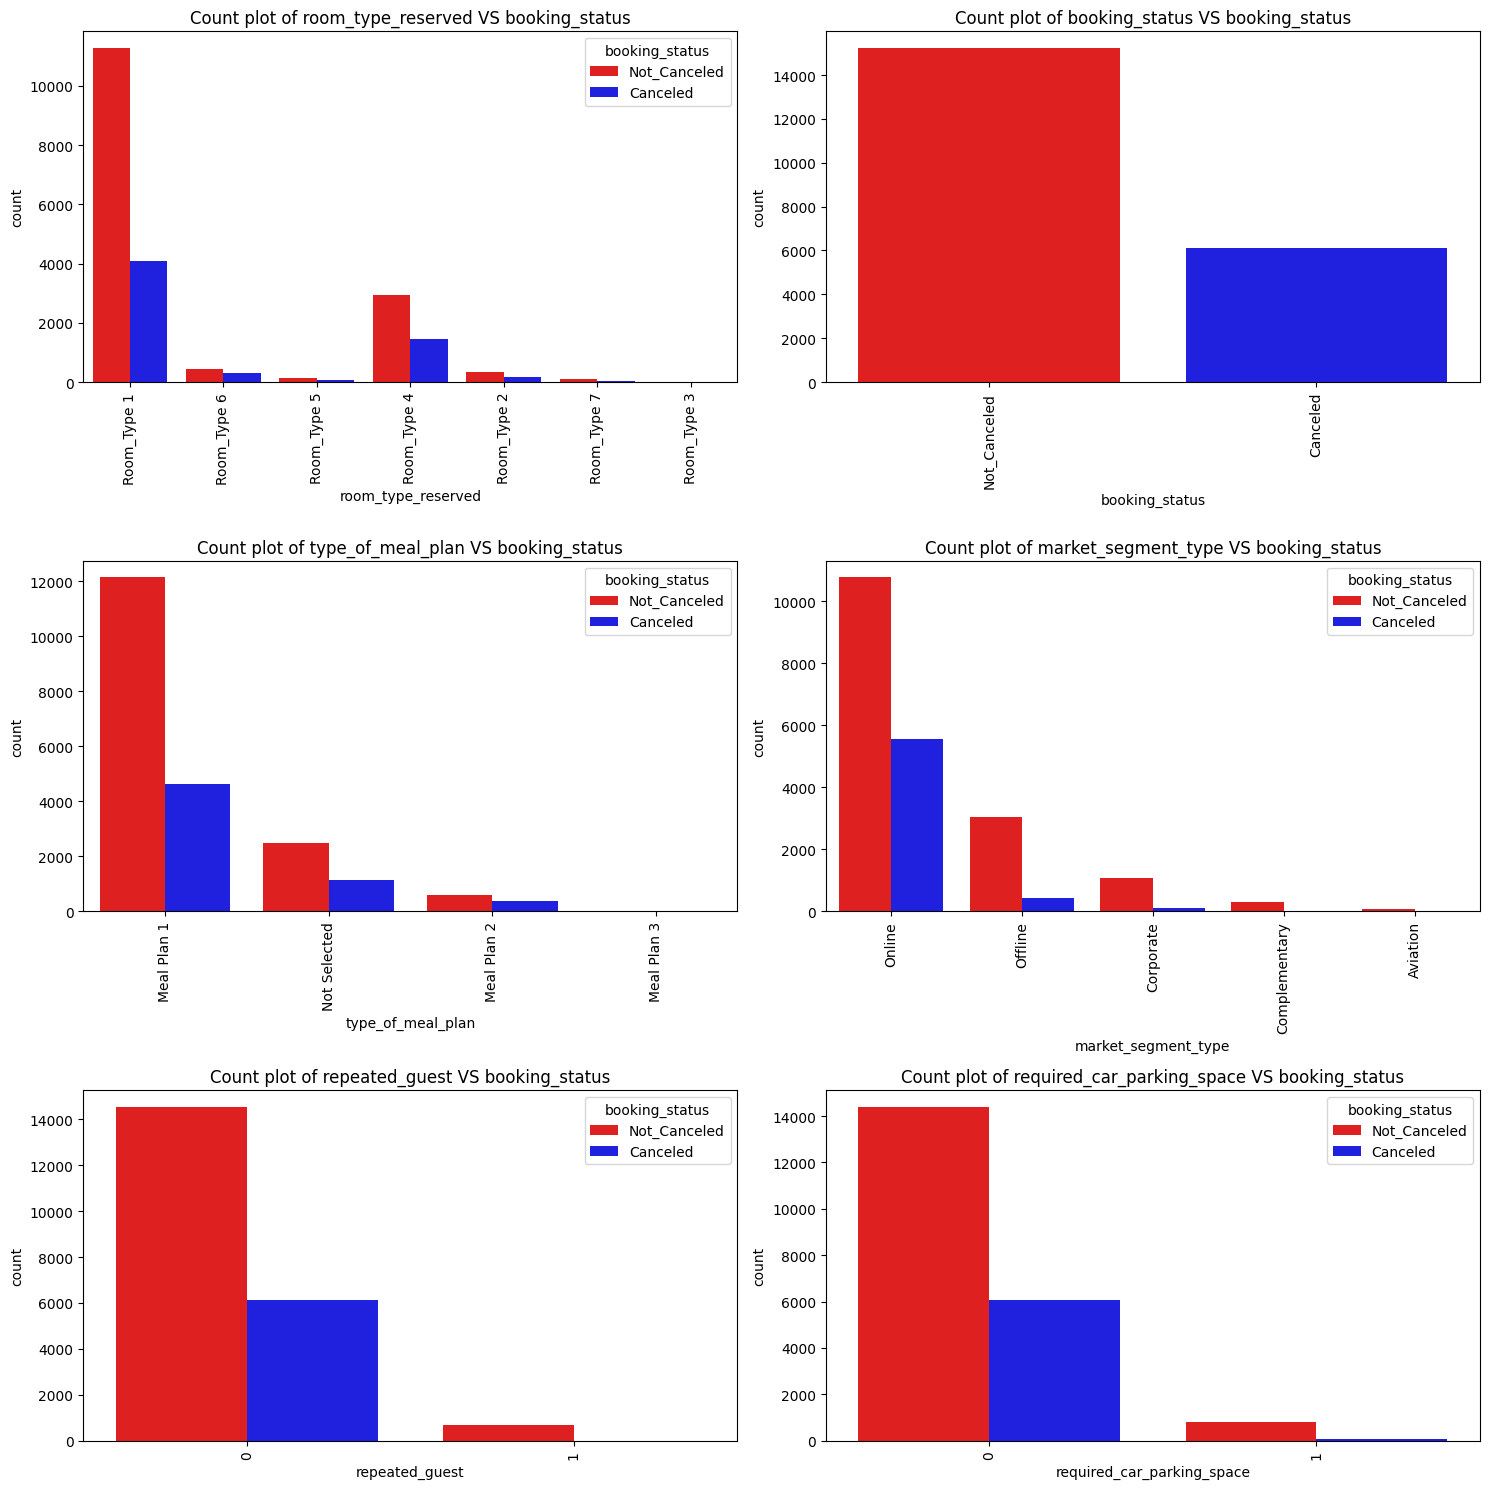

In [123]:
plot_bivariate_cat(data, 'booking_status', cat_cols)

### DATA PROCESSING

In [124]:
df.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,2,1,2,1,Meal Plan 1,0,Room_Type 1,26,2017,10,17,Online,0,0,0,161.00,0,Not_Canceled
1,2,1,1,1,Meal Plan 1,0,Room_Type 1,98,2018,7,16,Online,0,0,0,121.50,2,Not_Canceled
2,2,0,0,3,Meal Plan 1,0,Room_Type 1,433,2018,9,8,Offline,0,0,0,70.00,0,Canceled
3,2,0,2,5,Meal Plan 1,0,Room_Type 1,195,2018,8,8,Offline,0,0,0,72.25,0,Not_Canceled
4,1,0,0,2,Meal Plan 1,0,Room_Type 1,188,2018,6,15,Offline,0,0,0,130.00,0,Canceled


In [125]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21359 entries, 0 to 29019
Data columns (total 18 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   no_of_adults                          21359 non-null  int64  
 1   no_of_children                        21359 non-null  int64  
 2   no_of_weekend_nights                  21359 non-null  int64  
 3   no_of_week_nights                     21359 non-null  int64  
 4   type_of_meal_plan                     21359 non-null  object 
 5   required_car_parking_space            21359 non-null  int64  
 6   room_type_reserved                    21359 non-null  object 
 7   lead_time                             21359 non-null  int64  
 8   arrival_year                          21359 non-null  int64  
 9   arrival_month                         21359 non-null  int64  
 10  arrival_date                          21359 non-null  int64  
 11  market_segment_type 

#### Note: We cannot pass an Object into a Machine learning model

In [126]:
## Label encoding for categorical features
from sklearn.preprocessing import LabelEncoder

In [127]:
label_encoder = LabelEncoder()
mappings = {}
for col in cat_cols:
    df[col] = label_encoder.fit_transform(df[col])
    mappings[col] = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))

In [128]:
mappings    # to check the mapping of categorical features to numerical values

{'room_type_reserved': {'Room_Type 1': np.int64(0),
  'Room_Type 2': np.int64(1),
  'Room_Type 3': np.int64(2),
  'Room_Type 4': np.int64(3),
  'Room_Type 5': np.int64(4),
  'Room_Type 6': np.int64(5),
  'Room_Type 7': np.int64(6)},
 'booking_status': {'Canceled': np.int64(0), 'Not_Canceled': np.int64(1)},
 'type_of_meal_plan': {'Meal Plan 1': np.int64(0),
  'Meal Plan 2': np.int64(1),
  'Meal Plan 3': np.int64(2),
  'Not Selected': np.int64(3)},
 'market_segment_type': {'Aviation': np.int64(0),
  'Complementary': np.int64(1),
  'Corporate': np.int64(2),
  'Offline': np.int64(3),
  'Online': np.int64(4)},
 'repeated_guest': {np.int64(0): np.int64(0), np.int64(1): np.int64(1)},
 'required_car_parking_space': {np.int64(0): np.int64(0),
  np.int64(1): np.int64(1)}}

In [129]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21359 entries, 0 to 29019
Data columns (total 18 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   no_of_adults                          21359 non-null  int64  
 1   no_of_children                        21359 non-null  int64  
 2   no_of_weekend_nights                  21359 non-null  int64  
 3   no_of_week_nights                     21359 non-null  int64  
 4   type_of_meal_plan                     21359 non-null  int64  
 5   required_car_parking_space            21359 non-null  int64  
 6   room_type_reserved                    21359 non-null  int64  
 7   lead_time                             21359 non-null  int64  
 8   arrival_year                          21359 non-null  int64  
 9   arrival_month                         21359 non-null  int64  
 10  arrival_date                          21359 non-null  int64  
 11  market_segment_type 

#### Checking for Multicolinearity

In [ ]:
 !pip install statsmodels

In [131]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

In [132]:
X= add_constant(df)
# Calculate VIF for each feature
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

In [133]:
vif_data

,feature,VIF
0,const,4.100197e+07
1,no_of_adults,1.341180e+00
2,no_of_children,1.282459e+00
3,no_of_weekend_nights,1.073215e+00
4,no_of_week_nights,1.125260e+00
5,type_of_meal_plan,1.178228e+00
6,required_car_parking_space,1.036105e+00
7,room_type_reserved,1.549859e+00
8,lead_time,1.406287e+00
9,arrival_year,1.288533e+00


#### Data Does Not Satisfy the Assumption of Multicollinearity

In [134]:
# correlation matrix
corr_matrix = df.corr()

In [135]:
corr_matrix

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
no_of_adults,1.000000,-0.049738,0.092764,0.114218,-0.005977,0.000419,0.275089,0.150995,0.096366,0.004833,0.018382,0.310783,-0.238974,-0.063739,-0.143903,0.327749,0.156833,-0.097198
no_of_children,-0.049738,1.000000,0.011033,0.019408,-0.102631,0.018089,0.351786,0.010094,0.036248,0.002606,0.027934,0.103359,-0.048678,-0.020954,-0.029112,0.352640,0.099069,-0.060030
no_of_weekend_nights,0.092764,0.011033,1.000000,0.223154,-0.041123,-0.057417,0.029964,0.131240,0.029016,0.011300,0.006921,0.091510,-0.088633,-0.028935,-0.040008,-0.003579,0.013803,-0.067944
no_of_week_nights,0.114218,0.019408,0.223154,1.000000,-0.073247,-0.061798,0.085547,0.223953,0.022199,0.030029,-0.000633,0.116978,-0.115186,-0.033133,-0.051829,0.018420,0.032304,-0.124415
type_of_meal_plan,-0.005977,-0.102631,-0.041123,-0.073247,1.000000,-0.024666,-0.245616,-0.055124,0.094627,0.008576,-0.006094,0.184654,-0.075476,-0.017205,-0.044891,-0.100708,-0.011933,-0.035864
required_car_parking_space,0.000419,0.018089,-0.057417,-0.061798,-0.024666,1.000000,0.016335,-0.046767,0.010158,-0.015330,-0.009352,-0.039210,0.113582,0.026876,0.066665,0.055536,0.075479,0.092511
room_type_reserved,0.275089,0.351786,0.029964,0.085547,-0.245616,0.016335,1.000000,-0.014666,0.090492,0.001906,0.024315,0.089176,-0.045353,-0.013842,-0.024727,0.490983,0.086319,-0.072128
lead_time,0.150995,0.010094,0.131240,0.223953,-0.055124,-0.046767,-0.014666,1.000000,0.169463,0.132140,0.034112,0.140396,-0.148948,-0.053930,-0.087026,-0.044061,-0.012787,-0.368151
arrival_year,0.096366,0.036248,0.029016,0.022199,0.094627,0.010158,0.090492,0.169463,1.000000,-0.322786,0.011340,0.111445,-0.010158,0.011111,0.025551,0.174569,0.000594,-0.149673
arrival_month,0.004833,0.002606,0.011300,0.030029,0.008576,-0.015330,0.001906,0.132140,-0.322786,1.000000,-0.020386,-0.017885,0.001744,-0.043586,-0.003881,0.066156,0.136037,0.015898


<Axes: >

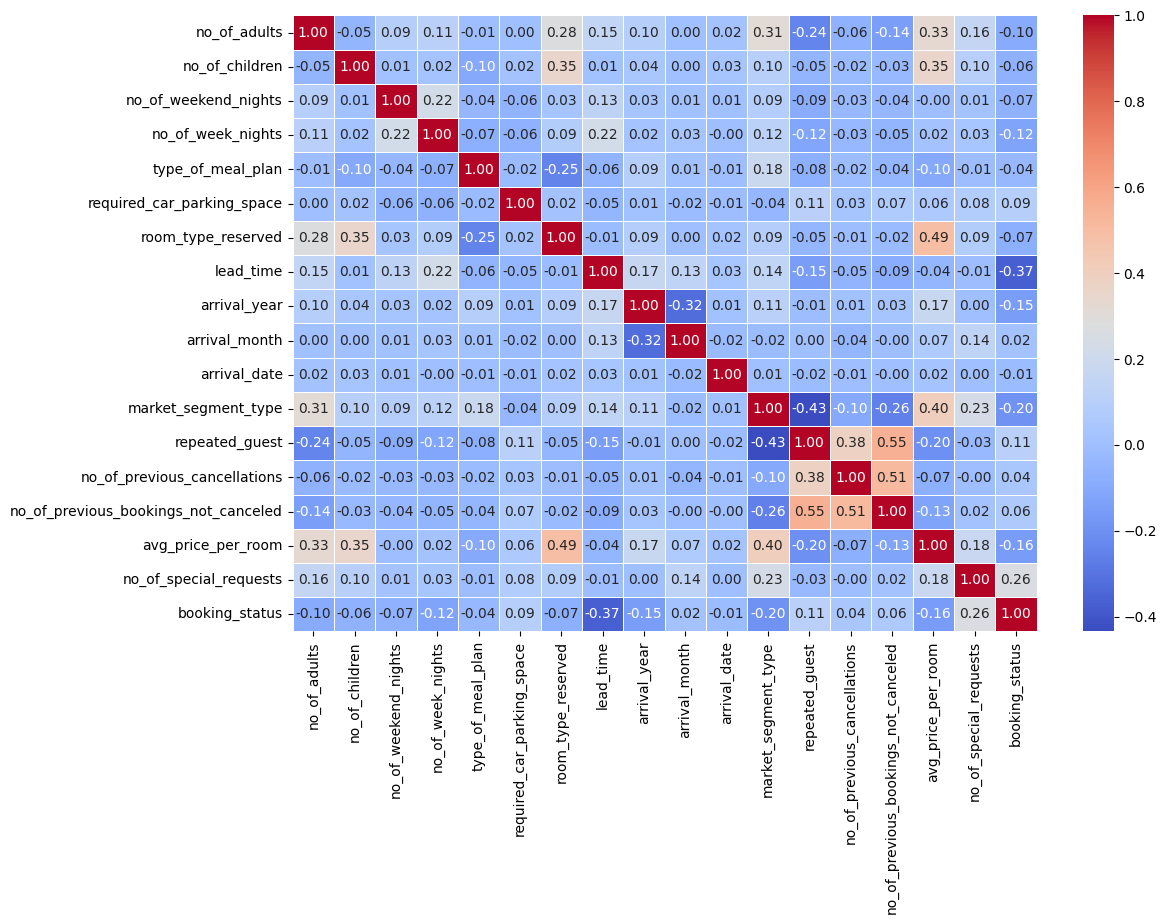

In [136]:
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)

##### Checking for Skewness

In [137]:
skewness = df.skew()

In [138]:
skewness

no_of_adults                            -0.305652
no_of_children                           4.165696
no_of_weekend_nights                     0.636637
no_of_week_nights                        1.553657
type_of_meal_plan                        1.650716
required_car_parking_space               4.538315
room_type_reserved                       1.392145
lead_time                                1.405258
arrival_year                            -1.953273
arrival_month                           -0.293266
arrival_date                             0.010333
market_segment_type                     -2.333046
repeated_guest                           5.282330
no_of_previous_cancellations            22.001489
no_of_previous_bookings_not_canceled    16.735934
avg_price_per_room                       0.542888
no_of_special_requests                   0.922373
booking_status                          -0.942305
dtype: float64

In [139]:
for col in df.columns:
    if skewness[col] > 5:
        df[col] = np.log1p(df[col])  # Apply log transformation to reduce skewness  

#### Imbalanced Data

In [140]:
df["booking_status"].value_counts()

booking_status
1    15231
0     6128
Name: count, dtype: int64

In [141]:
X = df.drop(columns=['booking_status'])
y = df['booking_status']

In [142]:
X.columns

Index(['no_of_adults', 'no_of_children', 'no_of_weekend_nights',
       'no_of_week_nights', 'type_of_meal_plan', 'required_car_parking_space',
       'room_type_reserved', 'lead_time', 'arrival_year', 'arrival_month',
       'arrival_date', 'market_segment_type', 'repeated_guest',
       'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled',
       'avg_price_per_room', 'no_of_special_requests'],
      dtype='object')

In [ ]:
!pip install imbalanced-learn

In [144]:
y.value_counts()

booking_status
1    15231
0     6128
Name: count, dtype: int64

In [145]:
from imblearn.over_sampling import SMOTE

In [146]:
X_res, y_res = SMOTE().fit_resample(X, y)

In [147]:
y_res.value_counts()

booking_status
1    15231
0    15231
Name: count, dtype: int64

In [148]:
#df.shape

#### Creating a Balanced Dataframe

In [149]:
balanced_df = pd.DataFrame(X_res, columns=X.columns)
balanced_df['booking_status'] = y_res

In [150]:
balanced_df.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,2,1,2,1,0,0,0,26,2017,10,17,4,0.0,0.0,0.0,161.00,0,1
1,2,1,1,1,0,0,0,98,2018,7,16,4,0.0,0.0,0.0,121.50,2,1
2,2,0,0,3,0,0,0,433,2018,9,8,3,0.0,0.0,0.0,70.00,0,0
3,2,0,2,5,0,0,0,195,2018,8,8,3,0.0,0.0,0.0,72.25,0,1
4,1,0,0,2,0,0,0,188,2018,6,15,3,0.0,0.0,0.0,130.00,0,0


In [151]:
balanced_df.shape

(30462, 18)

In [152]:
df = balanced_df.copy()

In [153]:
df.shape

(30462, 18)

#### Feature Selection

In [154]:
len(df.columns)

18

In [155]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

In [156]:
X = df.drop(columns=['booking_status'])
y = df['booking_status']

In [157]:
model = RandomForestClassifier(random_state=42)
model.fit(X, y)

RandomForestClassifier(random_state=42)

In [158]:
feature_importance= model.feature_importances_

In [159]:
feature_importance_df = pd.DataFrame({'Feature': X.columns,
                                     'Importance': feature_importance})

In [160]:
feature_importance_df

,Feature,Importance
0,no_of_adults,0.018413
1,no_of_children,0.007008
2,no_of_weekend_nights,0.029864
3,no_of_week_nights,0.044718
4,type_of_meal_plan,0.020449
5,required_car_parking_space,0.011449
6,room_type_reserved,0.019753
7,lead_time,0.263645
8,arrival_year,0.018011
9,arrival_month,0.085816


In [161]:
#sort features by importance
feature_importance_df.sort_values(by='Importance', ascending=False)

,Feature,Importance
7,lead_time,0.263645
16,no_of_special_requests,0.182014
15,avg_price_per_room,0.149168
9,arrival_month,0.085816
10,arrival_date,0.082528
11,market_segment_type,0.057565
3,no_of_week_nights,0.044718
2,no_of_weekend_nights,0.029864
4,type_of_meal_plan,0.020449
6,room_type_reserved,0.019753


In [162]:
top_features_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

In [163]:
#select top 10 features

top_10_features = top_features_importance_df["Feature"].head(10).values
top_10_df = df[top_10_features.tolist() + ['booking_status']]

In [164]:
top_10_df.head()

,lead_time,no_of_special_requests,avg_price_per_room,arrival_month,arrival_date,market_segment_type,no_of_week_nights,no_of_weekend_nights,type_of_meal_plan,room_type_reserved,booking_status
0,26,0,161.00,10,17,4,1,2,0,0,1
1,98,2,121.50,7,16,4,1,1,0,0,1
2,433,0,70.00,9,8,3,3,0,0,0,0
3,195,0,72.25,8,8,3,5,2,0,0,1
4,188,0,130.00,6,15,3,2,0,0,0,0


In [165]:
len(top_10_df.columns)

11

In [166]:
df = top_10_df.copy()

#### MODEL SELECTION

In [167]:
!pip install xgboost lightgbm

In [168]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score   

In [169]:
X = df.drop(columns=['booking_status'])
y = df['booking_status']

In [170]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [171]:
#intializing models
classifiers = {
    'Logistic Regression': LogisticRegression(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42),
    'AdaBoost': AdaBoostClassifier(random_state=42),
    'XGBoost': XGBClassifier(random_state=42),
    'LightGBM': LGBMClassifier(random_state=42),
    'SVC': SVC(random_state=42),
    'KNeighbors': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Naive Bayes': GaussianNB()
}

In [172]:
metrics = {
    'Model': [],
    'Accuracy': [],
    'Recall': [],
    'Precision': [],
    'F1_score': []
}

##### Training and evaluating each classifier

In [ ]:
for model_name, classifier in classifiers.items():
    classifier.fit(X_train, y_train)
    
    y_pred = classifier.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    metrics['Model'].append(model_name)
    metrics['Accuracy'].append(accuracy)
    metrics['Precision'].append(precision)
    metrics['Recall'].append(recall)
    metrics['F1_score'].append(f1)


In [174]:
#convert metrics dict to dataframe
metrics_df= pd.DataFrame(metrics)

In [175]:
metrics_df

,Model,Accuracy,Recall,Precision,F1_score
0,Logistic Regression,0.781388,0.750489,0.802787,0.775758
1,Random Forest,0.893484,0.896091,0.892892,0.894489
2,Gradient Boosting,0.842114,0.868404,0.826923,0.847156
3,AdaBoost,0.809289,0.813029,0.809339,0.811180
4,XGBoost,0.873297,0.878827,0.870884,0.874838
5,LightGBM,0.869358,0.890879,0.855757,0.872965
6,SVC,0.718201,0.702932,0.728316,0.715399
7,KNeighbors,0.777778,0.676547,0.851928,0.754176
8,Decision Tree,0.844412,0.831922,0.855325,0.843461
9,Naive Bayes,0.772854,0.727362,0.803237,0.763419


#### TRAINING RF MODEL


##### Hyperparameter Tuning

In [176]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

In [177]:
X = df.drop(columns=['booking_status'])
y = df['booking_status']

In [178]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)   

In [179]:
rf = RandomForestClassifier(random_state=42)

In [189]:
params_dist = {
    'n_estimators': randint(100, 500),
    'max_depth': randint(10, 500),
    'min_samples_split': randint(2, 10),
    'min_samples_leaf': randint(1, 5),
    'bootstrap' : [True, False]
}

In [190]:
#initialize RandomizedSearchCV
random_search = RandomizedSearchCV(estimator=rf,
                                      param_distributions=params_dist,
                                      n_iter=5, cv=5, verbose=2, random_state=42,
                                       scoring='accuracy')

In [ ]:
random_search.fit(X_train, y_train)

In [193]:
random_search.best_params_

{'bootstrap': False,
 'max_depth': 198,
 'min_samples_leaf': 1,
 'min_samples_split': 8,
 'n_estimators': 221}

In [194]:
best_rf_model = random_search.best_estimator_

In [195]:
y_pred = best_rf_model.predict(X_test)

In [196]:
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

In [197]:
accuracy, recall, precision, f1

(0.8956179222058099, 0.903257328990228, 0.8910668380462725, 0.8971206729213846)

#### SAVE MODEL

In [198]:
import joblib

In [200]:
joblib.dump(best_rf_model, 'random_forest.pkl')

['random_forest.pkl']

In [201]:
loaded_model = joblib.load('random_forest.pkl')

In [202]:
X_train[4:5]

,lead_time,no_of_special_requests,avg_price_per_room,arrival_month,arrival_date,market_segment_type,no_of_week_nights,no_of_weekend_nights,type_of_meal_plan,room_type_reserved
29268,29,0,111.572178,4,12,4,2,0,0,0


In [206]:
new_data = np.array([29,0,111.572178,4,12,4,2,0,0,0]).reshape(1, -1)

In [207]:
prediction= loaded_model.predict(new_data)

In [208]:
prediction

array([0])